In [2]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Criação dos DFs 
magic_kingdom = pd.read_csv('Dados/mk.csv', sep=';')
universal_studios = pd.read_csv('Dados/us.csv', sep=';')

In [4]:
# Achando o lambda do Magic Kingdom
df_filtrado_mk = magic_kingdom[(magic_kingdom['Ano'] == 2017) | (magic_kingdom['Ano'] == 2018) | (magic_kingdom['Ano'] == 2019)]

df_filtrado_mk['Qtd (mi)'] = pd.to_numeric(df_filtrado_mk['Qtd (mi)'].str.replace(',', '.'))

lambda_mk = df_filtrado_mk['Qtd (mi)'].mean()

C:\Users\anaca\AppData\Local\Temp\ipykernel_8372\3909954484.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado_mk['Qtd (mi)'] = pd.to_numeric(df_filtrado_mk['Qtd (mi)'].str.replace(',', '.'))


In [5]:
# Achando o lambda do Universal Studios
df_filtrado_us = universal_studios[(universal_studios['Ano'] == 2017) | (universal_studios['Ano'] == 2018) | (universal_studios['Ano'] == 2019)]

df_filtrado_us['Qtd (mi)'] = pd.to_numeric(df_filtrado_us['Qtd (mi)'].str.replace(',', '.'))

lambda_us = df_filtrado_us['Qtd (mi)'].mean()

C:\Users\anaca\AppData\Local\Temp\ipykernel_8372\887915888.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado_us['Qtd (mi)'] = pd.to_numeric(df_filtrado_us['Qtd (mi)'].str.replace(',', '.'))


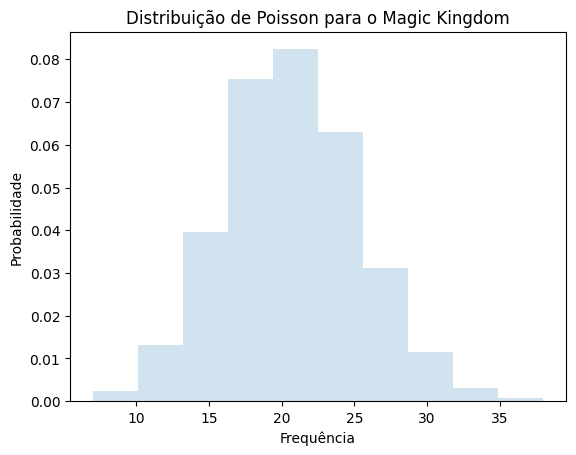

In [6]:
# Criando a distribuição de Poisson para o Magic Kingdom
distribuicao_mk = stats.poisson.rvs(mu=lambda_mk, size=10000)

# Gráfico da distribuição de Poisson para o Magic Kingdom	
plt.hist(distribuicao_mk, density=True, histtype='stepfilled', alpha=0.2)
plt.title('Distribuição de Poisson para o Magic Kingdom')
plt.xlabel('Frequência')
plt.ylabel('Probabilidade')
plt.show()


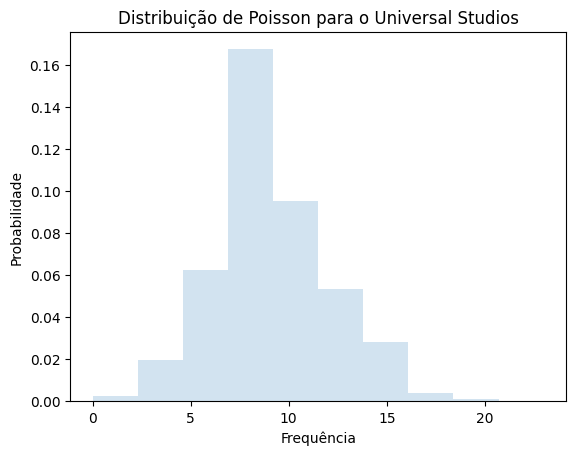

In [7]:
# Criando a distribuição de Poisson para o Universal Studios
distribuicao_us = stats.poisson.rvs(mu=lambda_us, size=10000)

# Gráfico da distribuição de Poisson para o Universal Studios	
plt.hist(distribuicao_us, density=True, histtype='stepfilled', alpha=0.2)
plt.title('Distribuição de Poisson para o Universal Studios')
plt.xlabel('Frequência')
plt.ylabel('Probabilidade')
plt.show()

In [8]:
# CDF do Universal Studios dado lambda do Magic Kingdom
cdf_us_dado_mk = stats.poisson.cdf(lambda_us, lambda_mk)

cdf_us_dado_mk

0.003198773316314992

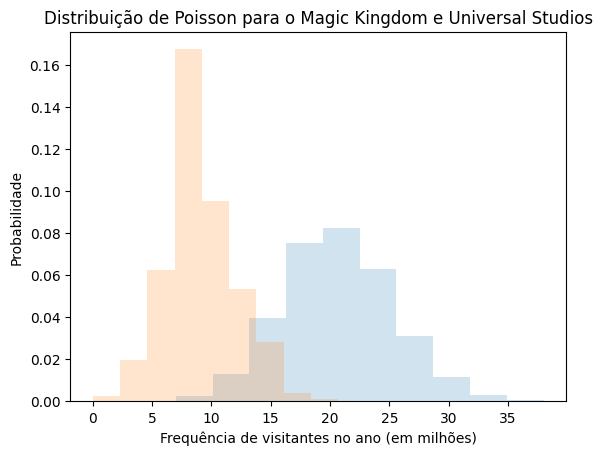

In [9]:
# Gráficos sobrepostos
plt.hist(distribuicao_mk, density=True, histtype='stepfilled', alpha=0.2)
plt.hist(distribuicao_us, density=True, histtype='stepfilled', alpha=0.2)
plt.title('Distribuição de Poisson para o Magic Kingdom e Universal Studios')
plt.xlabel('Frequência de visitantes no ano (em milhões)')
plt.ylabel('Probabilidade')
plt.show()